In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
from gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from information_estimation import *
from image_utils import *

from led_array.bsccm_utils import *
from bsccm import BSCCM
from jax import jit
import numpy as onp
import jax.numpy as np

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

Opening BSCCM
Opened BSCCM


## Why does adding to experimental data create problems

In [2]:
edge_crop = 24
patch_size = 20
channel = 'LED119'

num_images = 5000
num_patches = 5000

photons_per_pixel = 150

noisy_images = load_bsccm_images(bsccm, channel, num_images=num_images, edge_crop=edge_crop, convert_units_to_photons=True, median_filter=False)
noisy_patches = extract_patches(noisy_images, patch_size=patch_size, num_patches=num_patches)

clean_images = load_bsccm_images(bsccm, channel, num_images=num_images, edge_crop=edge_crop, convert_units_to_photons=False, median_filter=True)
clean_patches = extract_patches(clean_images, patch_size=patch_size, num_patches=num_patches)


In [3]:

noisy_patches_experimental = add_shot_noise_to_experimenal_data(patches, photon_fraction=photons_per_pixel / np.mean(images))
noisy_patches = add_noise(patches * photons_per_pixel / np.mean(images))

Estimated H(Y|X) = 5.588 bits/pixel
Estimated H(Y) = 5.248 bits/pixel
Estimated I(Y;X) = -0.339 bits/pixel
Estimated H(Y|X) = 5.585 bits/pixel
Estimated H(Y) = 6.103 bits/pixel
Estimated I(Y;X) = 0.518 bits/pixel
-0.3393597885515991 0.5177801133427611


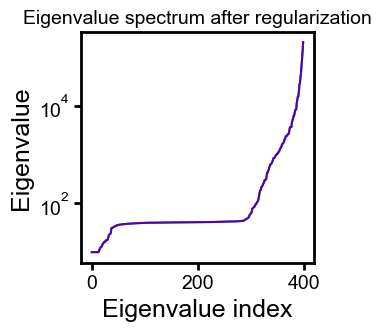

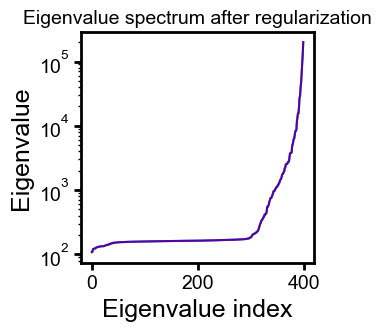

In [4]:
mi_noisy = estimate_mutual_information(noisy_patches_experimental, show_eigenvalue_plot=True, eigenvalue_floor=10, verbose=True)
mi = estimate_mutual_information(noisy_patches, show_eigenvalue_plot=True, eigenvalue_floor=1, verbose=True)

print(mi_noisy, mi)


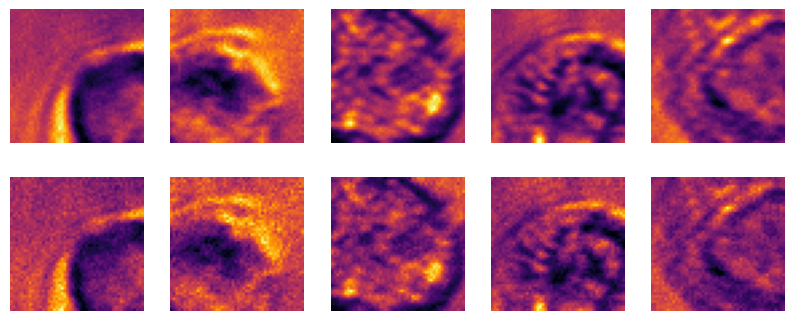

In [24]:
# plot 5 example patches of both
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(5):
    axes[0, i].imshow(noisy_patches_experimental[i], cmap='inferno')
    axes[1, i].imshow(noisy_patches[i], cmap='inferno')
    axes[0, i].axis('off')
    axes[1, i].axis('off')
